## Open pit mine- SCM Dataset EDA.

In [1]:
#import the useful libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import datetime as dt

### Reading Cycle data.

In [2]:
#Reading cycle data
df= pd.read_csv('CycleData.csv')

In [3]:
# Using set_option to display all rows and columns
pd.set_option('display.max_rows', None, 'display.max_columns', None)

In [4]:
#cheching head of data
df.head()

,ASSOCPAYLOADNOMINAL,AT Available Time (iMine),Autonomous,Available SMU Time,Available Time,Completed Cycle Count,COMPLETEDCYCLEDURATION,Creation Mode,CT Calendar SMU Time,CT Calendar Time,Cycle Duration,Cycle SMU Duration,Cycle Type,Delay Time,Down Time,DTE Down Time Equipment,Dumping Duration,Dumping SMU Duration,Destination Dumping Start Timestamp (GMT8),Empty EFH Distance,Empty EFH Length,Empty Expected Travel Duration,Empty Fall Height,Empty Plan Length,Empty Rise Height,Empty Slope Distance,Empty Slope Length,Empty Target Travel Duration,Empty Travel Duration,End Processor Name,Cycle End Timestamp (GMT8),Estimated Fuel Used,Fuel Used,Full Expected Travel Duration,Full Travel Duration,IC,Idle Duration,iMine Availability,iMine Engine Hours,iMine Load FCTR Truck,iMine Operating Hours,iMine Utilisation,Loading Count,Loading Duration,Loading Efficiency,Source Loading End Timestamp (GMT8),Source Loading Start Timestamp (GMT8),OPERATINGBURNRATE,OPERATINGTIME (CAT),OPERHOURSSECONDS,Payload (kg),Payload (t),PREVIOUSSECONDARYMACHINE,PREVIOUSSINKDESTINATION,QUEUEATSINKDURATION,Queuing at Sink Duration,Queuing at Source Duration,Queuing Duration,Source Queuing Start Timestamp (GMT8),SD_SCHEDULEDDOWNTIME,SDE_SCHEDULEDDOWNEQUIP,Cycle Start Timestamp (GMT8),TC,TMPH,TOTALTIME (CAT),Travelling Empty Duration,Travelling Full Duration,TRUCKQUEUEATSOURCEDURATION,UNSCHEDULEDDOWNCOUNT,UNSCHEDULEDDOWNTIME,Record Updated Timestamp (GMT8),WAITFORDUMPDURATION,WAITFORLOADDURATION,WORKINGBURNRATE,WORKINGDURATION,Source Location Name,Source Location Description,Source Location is Active Flag,Source Location is Source Flag,Destination Location Name,Destination Location Description,Destination Location is Active Flag,Destination Location is Source Flag,Primary Machine Name,Primary Machine Category Name,Primary Machine Class Name,Secondary Machine Name,Secondary Machine Category Name,Secondary Machine Class Name,Crew OID,Job Code Description,Job Code Name,Job Type
0,NaN,737,1.0,737,737,1,737,0,737,737,737,737,TruckCycle,0,0,0,51.0,51.0,44032.093646,1628.71280,1628.71280,89.0,48.213444,1603.33370,1900-01-04 04:29:14.000,1605.25010,1605.25010,0.0,313.0,C1,2020-07-20 02:15:42.000,0,0.011356,17.0,373.0,1,58,1,737,DT5209,737,1,1.0,217.0,NaN,44032.091921,44032.089410,0.000015,737,737,260300.0,260.3,EX7028,DS_OB18_BLACKWOOD,14.0,14.0,44.0,58.0,44032.088472,0,0,2020-07-20 02:03:25.000,1,43525.938,737,239.0,110.0,NaN,0,0,2020-07-20 02:22:03.000,0.0,0.0,0.000017,679,DS_OB18_B_PAD,OB18|15S1B06,Y,Y,DS_C1,OB18|C1,Y,N,DT5209,Truck Classes,CAT 793F CMD,WL7058,Loader Classes,WA1200,10718152792,unknown,unknown,NaN
1,NaN,527,1.0,527,527,1,527,0,527,527,527,527,TruckCycle,0,0,0,50.0,50.0,44032.206829,244.76375,244.76375,4.0,0.866455,241.30754,1900-01-01 08:16:20.000,241.32736,241.32736,0.0,115.0,C1,2020-07-20 04:58:40.000,0,0.007041,19.0,363.0,1,44,1,527,DT5209,527,1,1.0,221.0,NaN,44032.205336,44032.202778,0.000013,527,527,224400.0,224.4,WL7058,DS_C1,14.0,14.0,30.0,44.0,44032.201979,0,0,2020-07-20 04:49:53.000,1,19591.871,527,58.0,93.0,NaN,0,0,2020-07-20 05:05:25.000,0.0,0.0,0.000015,483,DS_OB18_B_PAD,OB18|15S1B06,Y,Y,DS_C1,OB18|C1,Y,N,DT5209,Truck Classes,CAT 793F CMD,WL7058,Loader Classes,WA1200,10718152792,unknown,unknown,NaN
2,NaN,496,1.0,292,496,1,496,0,264,496,496,292,TruckCycle,0,0,0,51.0,30.0,44032.227384,255.88503,255.88503,4.0,0.902358,252.77408,1900-01-01 12:16:53.000,252.81076,252.81076,0.0,98.0,C1,2020-07-20 05:28:17.000,0,0.008706,29.0,300.0,1,66,1,496,DT5283,496,1,1.0,158.0,NaN,44032.225347,44032.223519,0.000018,496,496,232800.0,232.8,WL7058,DS_C1,14.0,14.0,5.0,19.0,44032.222963,0,0,2020-07-20 05:20:01.000,1,21472.049,496,63.0,92.0,NaN,0,0,2020-07-20 05:34:45.000,47.0,0.0,0.000020,430,DS_OB18_B_PAD,OB18|15S1B06,Y,Y,DS_C1,OB18|C1,Y,N,DT5283,Truck Classes,CAT 793F CMD,WL7058,Loader Classes,WA1200,10718152792,unknown,unknown,NaN
3,NaN,714,1.0,420,714,1,714,0,403,714,714,420,TruckCycle,0,0,0,51.0,30.0,44032.139560,333.25912,333.25912,4.0,1.270618,327.32336,190

In [5]:
#Checking the shape of the dataframe.
df.shape

(47344, 93)

In [6]:
#printing the information of variables to check their data types.
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47344 entries, 0 to 47343
Data columns (total 93 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   ASSOCPAYLOADNOMINAL                         21992 non-null  float64
 1   AT Available Time (iMine)                   47344 non-null  int64  
 2   Autonomous                                  44582 non-null  float64
 3   Available SMU Time                          47344 non-null  int64  
 4   Available Time                              47344 non-null  int64  
 5   Completed Cycle Count                       47344 non-null  int64  
 6   COMPLETEDCYCLEDURATION                      47344 non-null  int64  
 7   Creation Mode                               47344 non-null  int64  
 8   CT Calendar SMU Time                        47344 non-null  int64  
 9   CT Calendar Time                            47344 non-null  int64  
 10  Cycle Dura

### Selecting Columns for the 4 Master table.

In [7]:
# Equipment Master Table

equipment_master_cols = ['Primary Machine Name',
        'Primary Machine Class Name',
        'Secondary Machine Name',
        'Secondary Machine Class Name',
        'Cycle Type',
        'Loading Count',
        'iMine Load FCTR Truck',
        'AT Available Time (iMine)',
        'Full Travel Duration',
        'Delay Time', 
        'Down Time',                         
        'Idle Duration',
        'Loading Duration',
        'Dumping Duration',
        'Payload (kg)',
        'Estimated Fuel Used',
        'Fuel Used',
        'OPERATINGTIME (CAT)',      
        'OPERATINGBURNRATE', 
        'TMPH']

# WAITFORDUMPDURATION is included in idle time
# we need to include maintenance time


In [8]:
# Equipment_Type_Master Table

equipment_type_cols = ['Cycle Type',
                       'Primary Machine Category Name',
                       'Secondary Machine Category Name',
                       'AT Available Time (iMine)',
                        'Available SMU Time',
                        'Cycle Duration',
                        'Cycle SMU Duration',
                        'Delay Time',
                        'Down Time', 
                        'Completed Cycle Count',
                        'iMine Availability',
                        'iMine Utilisation']

In [9]:
# Location_Master Table

location_master_cols = ['Source Location Name', 
                        'Destination Location Name',
                        'Queuing Duration',
                        'Cycle End Timestamp (GMT8)',
                        'Cycle Start Timestamp (GMT8)',
                        'Source Loading Start Timestamp (GMT8)',
                        'Source Loading End Timestamp (GMT8)']

In [10]:
# Location_Type_Master Table
location_type_cols = ['Queuing Duration',
                        'Source Location is Active Flag',
                        'Source Location is Source Flag',
                        'Destination Location is Active Flag',
                        'Destination Location is Source Flag']

### Extracting relevent columns to perform EDA.

In [11]:
relevant_cols = [i for i in df.columns if i in equipment_master_cols or 
            i in equipment_type_cols or 
            i in location_master_cols or 
            i in location_type_cols]


In [12]:
for i in relevant_cols:
    print(i)

AT Available Time (iMine)
Available SMU Time
Completed Cycle Count
Cycle Duration
Cycle SMU Duration
Cycle Type
Delay Time
Down Time
Dumping Duration
Cycle End Timestamp (GMT8)
Estimated Fuel Used
Fuel Used
Full Travel Duration
Idle Duration
iMine Availability
iMine Load FCTR Truck
iMine Utilisation
Loading Count
Loading Duration
Source Loading End Timestamp (GMT8)
Source Loading Start Timestamp (GMT8)
OPERATINGBURNRATE
OPERATINGTIME (CAT)
Payload (kg)
Queuing Duration
Cycle Start Timestamp (GMT8)
TMPH
Source Location Name
Source Location is Active Flag
Source Location is Source Flag
Destination Location Name
Destination Location is Active Flag
Destination Location is Source Flag
Primary Machine Name
Primary Machine Category Name
Primary Machine Class Name
Secondary Machine Name
Secondary Machine Category Name
Secondary Machine Class Name


In [13]:
len(relevant_cols)

39

### Creating Min and Max value function for outlier treatment.

##### Max_val Function.

In [14]:
def max_val(col_name):
    q3 = col_name.quantile(0.75)
    q1 = col_name.quantile(0.25)
    iqr = q3 - q1
    max_val = q3 + (iqr*1.5)
    return max_val

##### Min_Val Function.


In [15]:
def min_val(col_name):
    q3 = col_name.quantile(0.75)
    q1 = col_name.quantile(0.25)
    iqr = q3 - q1
    min_val = q1 - (iqr*1.5)
    return min_val

### Outlier treatment.

##### Now we will do the outlier treatment for relevant columns.

#### AT Available Time (iMine) Col.

In [16]:
df['AT Available Time (iMine)'].describe()

count    47344.000000
mean      1669.828299
std       4524.477286
min          0.000000
25%        271.000000
50%        868.000000
75%       1581.000000
max      86400.000000
Name: AT Available Time (iMine), dtype: float64

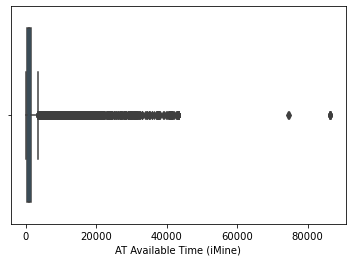

In [17]:
# Ploting boxplot graph to check outliers.
sns.boxplot(df['AT Available Time (iMine)'])
plt.show()

In [18]:
max_val(df['AT Available Time (iMine)'])

3546.0

In [19]:
df[df['AT Available Time (iMine)']>3516].shape

(2275, 93)

##### We have 2274 rows as outliers.

#### Cycle Duration Col.


In [20]:
df['Cycle Duration'].describe()

count    47344.000000
mean      1906.350836
std       5192.055685
min          0.000000
25%        276.000000
50%        894.000000
75%       1597.000000
max      43200.000000
Name: Cycle Duration, dtype: float64

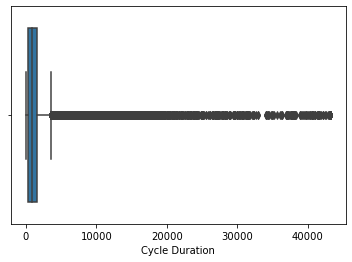

In [21]:
sns.boxplot(df['Cycle Duration'])
plt.show()

In [22]:
max_val(df['Cycle Duration'])

3578.5

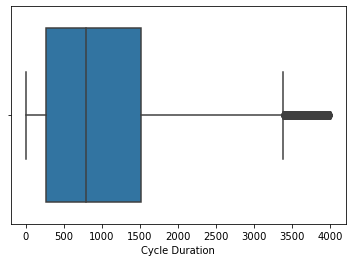

(560,)


In [23]:
sns.boxplot(data=df, x=df[df['Cycle Duration'] < 4000]['Cycle Duration'])
plt.show()
print(df[df['Cycle Duration'] > 33000]['Cycle Duration'].shape )

In [24]:
cd_outliers = df[df['Cycle Duration'] > 33000].index

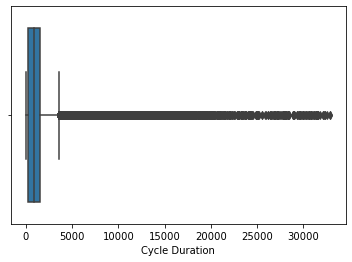

In [25]:
sns.boxplot(data=df, x=df[df['Cycle Duration'] < 33000]['Cycle Duration']) #for viz only
# sns.boxplot(data=df, x=df['Cycle Duration'])
plt.show()

### Delay Time

In [26]:
df['Delay Time'].describe()

count    47344.000000
mean       657.648445
std       4234.115162
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      43200.000000
Name: Delay Time, dtype: float64

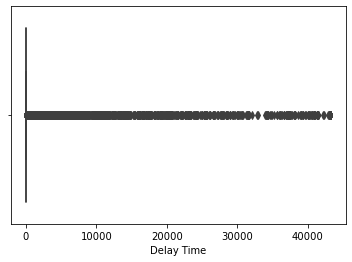

In [27]:
sns.boxplot(df['Delay Time'])
plt.show()

### Down Time

In [28]:
df['Down Time'].describe()

count    47344.000000
mean       657.648445
std       4234.115162
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      43200.000000
Name: Down Time, dtype: float64

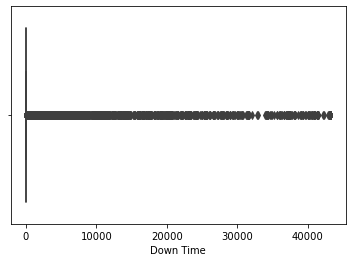

In [29]:
sns.boxplot(df['Down Time'])
plt.show()

In [30]:
max_val(df['Down Time'])

0.0

##### As per above analysis both Delay and Down Time columns has 0 as a maximun number of count as well as median and mean is also 0. Hence we are leaving this columns for as it is.

### Fuel Used

In [31]:
df['Fuel Used'].describe()

count    22590.000000
mean         0.052369
std          0.024765
min          0.000000
25%          0.038157
50%          0.053866
75%          0.066803
max          0.323691
Name: Fuel Used, dtype: float64

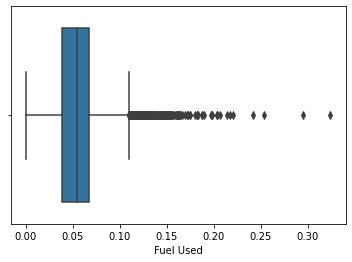

In [32]:
sns.boxplot(df['Fuel Used'])
plt.show()

In [33]:
max_val(df['Fuel Used'])

0.10977220937500001

In [34]:
df[df['Fuel Used'] > max_val(df['Fuel Used'])].shape

(298, 93)

In [35]:
#Removing outlier for Fuel Used col.
df['Fuel Used'] = df[df['Fuel Used'] < 0.11]['Fuel Used']

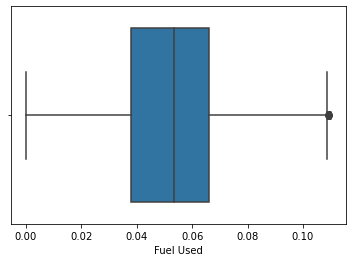

In [36]:
sns.boxplot(data=df, x=df['Fuel Used'] )
plt.show()

### Idle Duration

In [37]:
df['Idle Duration'].describe()

count    47344.000000
mean       457.452602
std       2872.463309
min          0.000000
25%          0.000000
50%         93.000000
75%        313.000000
max      43200.000000
Name: Idle Duration, dtype: float64

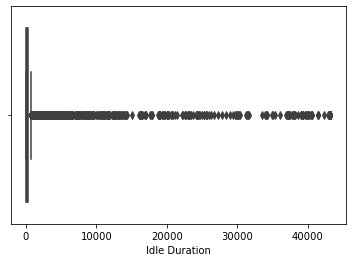

In [38]:
sns.boxplot(df['Idle Duration'])
plt.show()

In [48]:
max_val(df['Idle Duration'])

757.5

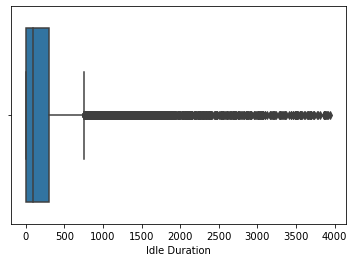

In [40]:
sns.boxplot(data=df, x=df[(df['Idle Duration'] < 4000)]['Idle Duration'])
plt.show()

In [44]:
df[(df['Idle Duration'] >4000)]['Idle Duration'].shape

(476,)

In [45]:
idle_outliers = df[(df['Idle Duration'] > 4000)]['Idle Duration'].index

In [46]:
df.drop(idle_outliers,0,inplace=True)

### Loading Duration

In [51]:
df['Loading Duration'].describe()

count    44305.000000
mean       176.988985
std         81.932101
min          0.000000
25%        126.000000
50%        167.000000
75%        218.000000
max       1264.000000
Name: Loading Duration, dtype: float64

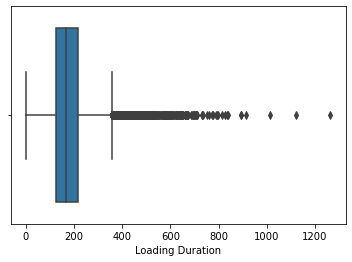

In [49]:
sns.boxplot(data=df, x=df['Loading Duration'])
plt.show()

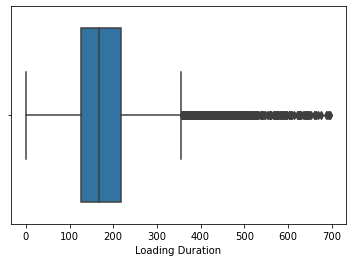

In [50]:
sns.boxplot(data=df, x=df[(df['Loading Duration'] < 700)]['Loading Duration'])
plt.show()

In [54]:
print(df[(df['Loading Duration'] > 700)]['Loading Duration'].shape )

(28,)


In [55]:
# Droping outliers
ld_outliers = df[df['Loading Duration'] == 0].index

In [56]:
df.drop(ld_outliers,0,inplace=True)

In [57]:
df.shape

(45650, 93)

### Dumping Duration

In [58]:
df['Dumping Duration'].describe()

count    21425.000000
mean        44.084761
std         16.682319
min          0.000000
25%         38.000000
50%         41.000000
75%         47.000000
max        819.000000
Name: Dumping Duration, dtype: float64

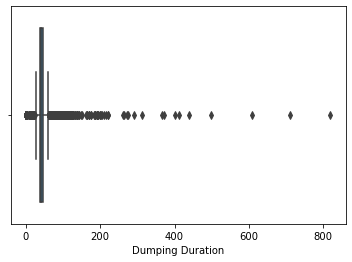

In [59]:
sns.boxplot(data=df, x=df['Dumping Duration'])
plt.show()

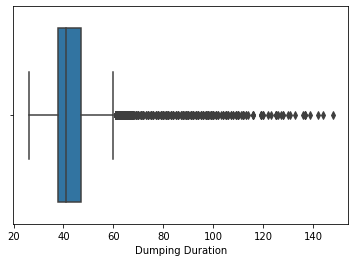

(401,)


In [60]:
sns.boxplot(data=df, x=df[(df['Dumping Duration'] < 150)&(df['Dumping Duration'] > 25)]['Dumping Duration'])
plt.show()
print(df[(df['Dumping Duration'] < 25)]['Dumping Duration'].shape )

In [61]:
min_val(df['Dumping Duration'])

24.5

In [62]:
dumping_outliers = df[(df['Dumping Duration'] < min_val(df['Dumping Duration']))].index

In [63]:
df.drop(dumping_outliers,0,inplace=True)

In [64]:
df.shape

(45249, 93)

### Full travel Duration

In [65]:
df['Full Travel Duration'].describe()

count    21024.000000
mean       805.339231
std        303.091368
min        181.000000
25%        642.000000
50%        777.000000
75%        945.000000
max       9886.000000
Name: Full Travel Duration, dtype: float64

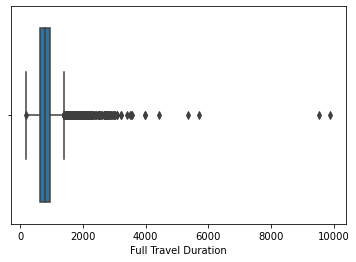

In [66]:
sns.boxplot(data=df, x=df['Full Travel Duration'])
plt.show()

In [67]:
max_val(df['Full Travel Duration'])

1399.5

In [68]:
df[df['Full Travel Duration'] > 1430].shape

(518, 93)

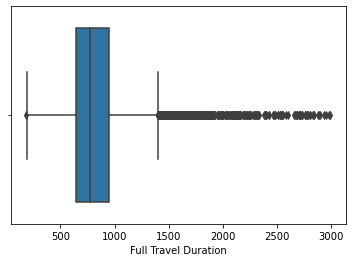

Values above threshold:  17


In [69]:
sns.boxplot(data=df, x=df[df['Full Travel Duration'] < 3000]['Full Travel Duration'])
plt.show()
print('Values above threshold: ',df[df['Full Travel Duration'] > 3000].shape[0])

In [70]:
print('values below min_val: ',df[df['Full Travel Duration'] < min_val(df['Full Travel Duration'])].shape[0])

values below min_val:  1


In [71]:
ftd_zero = df[df['Full Travel Duration'] == 0].index

In [72]:
ftd_outliers = df[(df['Full Travel Duration'] < min(df['Full Travel Duration']))|(df['Full Travel Duration'] > 3000)].index

In [73]:
df.drop(ftd_outliers, axis=0, inplace=True)

In [74]:
df[df['Full Travel Duration'] < min_val(df['Full Travel Duration'])].shape

(1, 93)

In [75]:
min_val(df['Full Travel Duration'])

189.0

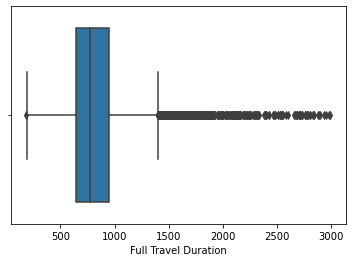

In [76]:
sns.boxplot(data=df, x=df['Full Travel Duration'])
plt.show()

In [77]:
df.shape

(45232, 93)

### Payload

In [78]:
df['Payload (kg)'].describe()

count     42669.000000
mean     237811.000961
std       18879.283251
min           0.000000
25%      230000.000000
50%      238900.000000
75%      247400.000000
max      329700.000000
Name: Payload (kg), dtype: float64

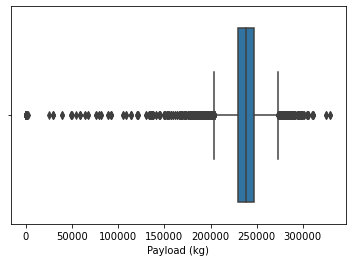

In [79]:
sns.boxplot(data=df, x=df['Payload (kg)'] )
plt.show()

In [80]:
df[(df['Payload (kg)'] > 120000)&(df['Payload (kg)'] < 150000)][['Cycle Type','Payload (kg)']].sort_values('Payload (kg)')

,Cycle Type,Payload (kg)
36319,LoaderCycle,120200.0
33859,TruckCycle,120200.0
35210,LoaderCycle,121800.0
35205,TruckCycle,121800.0
2390,TruckCycle,130500.0
2391,LoaderCycle,130500.0
28928,LoaderCycle,133600.0
28922,TruckCycle,133600.0
17870,LoaderCycle,133700.0
20848,TruckCycle,134600.0


Taking payload greater than 130000 

In [81]:
df[(df['Payload (kg)'] > 300000)&(df['Payload (kg)'] < 310000)][['Cycle Type','Payload (kg)']].sort_values('Payload (kg)')

,Cycle Type,Payload (kg)
16057,TruckCycle,300800.0
16058,LoaderCycle,300800.0
17513,TruckCycle,304100.0
17526,LoaderCycle,304100.0
37652,TruckCycle,304200.0
37663,LoaderCycle,304200.0
17511,TruckCycle,305200.0
17527,LoaderCycle,305200.0
15126,TruckCycle,305900.0
16674,LoaderCycle,305900.0


Taking payload less than 310000

In [82]:
df[df['Payload (kg)'] == 0][['Payload (kg)','Cycle Type']].value_counts()

Payload (kg)  Cycle Type 
0.0           LoaderCycle    89
              TruckCycle      8
dtype: int64

In [83]:
df[(df['Payload (kg)'] == 1)].shape

(0, 93)

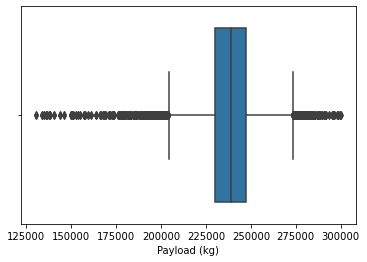

In [84]:
sns.boxplot(data=df, x=df[(df['Payload (kg)'] > 130000)&(df['Payload (kg)'] < 300000)]['Payload (kg)'])
plt.show()

Replacing the outliers with min and max_val

In [86]:
df[(df['Payload (kg)']< 175000)&(df['Payload (kg)'] < 300000)].shape

(227, 93)

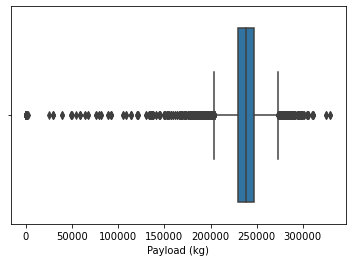

In [87]:
sns.boxplot(data=df, x=df['Payload (kg)'])
plt.show()

In [88]:
payload_outliers = df[(df['Payload (kg)']< 150000)&(df['Payload (kg)'] < 300000)].index

In [89]:
df.drop(payload_outliers,0,inplace=True)

In [91]:
df.shape

(45066, 93)

### Operating Time

In [92]:
df['OPERATINGTIME (CAT)'].describe()

count    45066.000000
mean      1195.104802
std       2445.152465
min          0.000000
25%        253.000000
50%        750.000000
75%       1520.000000
max      43200.000000
Name: OPERATINGTIME (CAT), dtype: float64

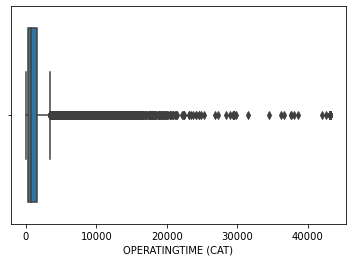

In [93]:
sns.boxplot(data=df, x=df['OPERATINGTIME (CAT)'])
plt.show()

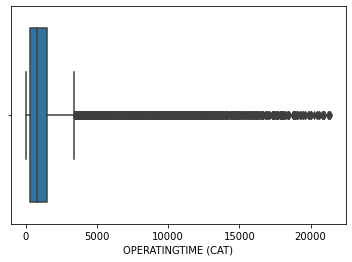

(101, 93)


In [94]:
sns.boxplot(data=df, x=df[df['OPERATINGTIME (CAT)']<22000]['OPERATINGTIME (CAT)'])
plt.show()
print(df[df['OPERATINGTIME (CAT)']>22000].shape)

In [95]:
operating_time_outliers = df[df['OPERATINGTIME (CAT)']>22000].index

In [96]:
df.drop(operating_time_outliers,0,inplace=True)

In [97]:
df.shape

(44965, 93)

### Filtering the dataframe based on diffrent Cycle Type.

In [98]:
truck_cycle = df[df['Cycle Type'] == 'TruckCycle']
loader_cycle = df[df['Cycle Type'] == 'LoaderCycle']
aux_mobile_cycle = df[df['Cycle Type'] == 'AuxMobileCycle']

#### Checking loader Cycle table

In [100]:
loader_cycle.shape

(21539, 93)

In [101]:
loader_cycle[equipment_master_cols].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21539 entries, 31 to 47315
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Primary Machine Name          21539 non-null  object 
 1   Primary Machine Class Name    21539 non-null  object 
 2   Secondary Machine Name        21539 non-null  object 
 3   Secondary Machine Class Name  21539 non-null  object 
 4   Cycle Type                    21539 non-null  object 
 5   Loading Count                 21539 non-null  float64
 6   iMine Load FCTR Truck         0 non-null      object 
 7   AT Available Time (iMine)     21539 non-null  int64  
 8   Full Travel Duration          0 non-null      float64
 9   Delay Time                    21539 non-null  int64  
 10  Down Time                     21539 non-null  int64  
 11  Idle Duration                 21539 non-null  int64  
 12  Loading Duration              21539 non-null  float64
 13  

In [102]:
loader_cycle[equipment_type_cols].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21539 entries, 31 to 47315
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Cycle Type                       21539 non-null  object
 1   Primary Machine Category Name    21539 non-null  object
 2   Secondary Machine Category Name  21539 non-null  object
 3   AT Available Time (iMine)        21539 non-null  int64 
 4   Available SMU Time               21539 non-null  int64 
 5   Cycle Duration                   21539 non-null  int64 
 6   Cycle SMU Duration               21539 non-null  int64 
 7   Delay Time                       21539 non-null  int64 
 8   Down Time                        21539 non-null  int64 
 9   Completed Cycle Count            21539 non-null  int64 
 10  iMine Availability               21539 non-null  int64 
 11  iMine Utilisation                21539 non-null  int64 
dtypes: int64(9), object(3)
memory u

In [103]:
loader_cycle[location_master_cols].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21539 entries, 31 to 47315
Data columns (total 7 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Source Location Name                   21539 non-null  object 
 1   Destination Location Name              0 non-null      object 
 2   Queuing Duration                       0 non-null      float64
 3   Cycle End Timestamp (GMT8)             21539 non-null  object 
 4   Cycle Start Timestamp (GMT8)           21539 non-null  object 
 5   Source Loading Start Timestamp (GMT8)  21539 non-null  float64
 6   Source Loading End Timestamp (GMT8)    21539 non-null  float64
dtypes: float64(3), object(4)
memory usage: 1.3+ MB


In [104]:
loader_cycle[location_type_cols].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21539 entries, 31 to 47315
Data columns (total 5 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Queuing Duration                     0 non-null      float64
 1   Source Location is Active Flag       21539 non-null  object 
 2   Source Location is Source Flag       21539 non-null  object 
 3   Destination Location is Active Flag  21539 non-null  object 
 4   Destination Location is Source Flag  21539 non-null  object 
dtypes: float64(1), object(4)
memory usage: 1009.6+ KB


#### Checking Truck Cycle table

In [105]:
truck_cycle[equipment_master_cols].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20964 entries, 0 to 47343
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Primary Machine Name          20964 non-null  object 
 1   Primary Machine Class Name    20964 non-null  object 
 2   Secondary Machine Name        20964 non-null  object 
 3   Secondary Machine Class Name  20964 non-null  object 
 4   Cycle Type                    20964 non-null  object 
 5   Loading Count                 20964 non-null  float64
 6   iMine Load FCTR Truck         20964 non-null  object 
 7   AT Available Time (iMine)     20964 non-null  int64  
 8   Full Travel Duration          20964 non-null  float64
 9   Delay Time                    20964 non-null  int64  
 10  Down Time                     20964 non-null  int64  
 11  Idle Duration                 20964 non-null  int64  
 12  Loading Duration              20964 non-null  float64
 13  D

In [106]:
print(truck_cycle[truck_cycle['Fuel Used'].isnull()]['Fuel Used'])
fuel_used_nulls = truck_cycle[truck_cycle['Fuel Used'].isnull()]['Fuel Used'].index


524     NaN
651     NaN
811     NaN
983     NaN
997     NaN
1081    NaN
1083    NaN
1092    NaN
1207    NaN
1701    NaN
1914    NaN
2330    NaN
2389    NaN
2647    NaN
2840    NaN
2904    NaN
2905    NaN
2971    NaN
3106    NaN
3999    NaN
4101    NaN
4105    NaN
4111    NaN
4124    NaN
4125    NaN
4572    NaN
4578    NaN
4651    NaN
5256    NaN
5672    NaN
5687    NaN
6266    NaN
6332    NaN
6369    NaN
6449    NaN
6642    NaN
6643    NaN
6656    NaN
6682    NaN
6694    NaN
6856    NaN
6902    NaN
7476    NaN
7579    NaN
7633    NaN
7694    NaN
7783    NaN
8097    NaN
8127    NaN
8133    NaN
8218    NaN
8219    NaN
8257    NaN
8499    NaN
9074    NaN
9083    NaN
9224    NaN
9227    NaN
9228    NaN
9231    NaN
9301    NaN
9805    NaN
9832    NaN
10294   NaN
10315   NaN
10320   NaN
10365   NaN
10819   NaN
12223   NaN
12285   NaN
12368   NaN
12437   NaN
12890   NaN
13180   NaN
13613   NaN
13619   NaN
13620   NaN
13789   NaN
13958   NaN
14542   NaN
14638   NaN
15354   NaN
15868   NaN
1595

In [107]:
len(fuel_used_nulls)

253

There are 253 missing values for Fuel used 

In [108]:
# drop all rows with missing null values in Fuel used column
df.drop(fuel_used_nulls,0,inplace=True)

In [109]:
print(len(truck_cycle[truck_cycle['Fuel Used'].isnull()]['Fuel Used']))
print(truck_cycle.shape)

253
(20964, 93)


In [110]:
truck_cycle[equipment_type_cols].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20964 entries, 0 to 47343
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Cycle Type                       20964 non-null  object
 1   Primary Machine Category Name    20964 non-null  object
 2   Secondary Machine Category Name  20964 non-null  object
 3   AT Available Time (iMine)        20964 non-null  int64 
 4   Available SMU Time               20964 non-null  int64 
 5   Cycle Duration                   20964 non-null  int64 
 6   Cycle SMU Duration               20964 non-null  int64 
 7   Delay Time                       20964 non-null  int64 
 8   Down Time                        20964 non-null  int64 
 9   Completed Cycle Count            20964 non-null  int64 
 10  iMine Availability               20964 non-null  int64 
 11  iMine Utilisation                20964 non-null  int64 
dtypes: int64(9), object(3)
memory us

In [112]:
truck_cycle[location_master_cols].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20964 entries, 0 to 47343
Data columns (total 7 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Source Location Name                   20964 non-null  object 
 1   Destination Location Name              20964 non-null  object 
 2   Queuing Duration                       20964 non-null  float64
 3   Cycle End Timestamp (GMT8)             20964 non-null  object 
 4   Cycle Start Timestamp (GMT8)           20964 non-null  object 
 5   Source Loading Start Timestamp (GMT8)  20964 non-null  float64
 6   Source Loading End Timestamp (GMT8)    20964 non-null  float64
dtypes: float64(3), object(4)
memory usage: 1.3+ MB


In [111]:
truck_cycle[location_type_cols].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20964 entries, 0 to 47343
Data columns (total 5 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Queuing Duration                     20964 non-null  float64
 1   Source Location is Active Flag       20964 non-null  object 
 2   Source Location is Source Flag       20964 non-null  object 
 3   Destination Location is Active Flag  20964 non-null  object 
 4   Destination Location is Source Flag  20964 non-null  object 
dtypes: float64(1), object(4)
memory usage: 982.7+ KB


#### Checking AuxMobile Cycle table

In [114]:
aux_mobile_cycle[equipment_master_cols].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2462 entries, 9421 to 43054
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Primary Machine Name          2462 non-null   object 
 1   Primary Machine Class Name    2462 non-null   object 
 2   Secondary Machine Name        2462 non-null   object 
 3   Secondary Machine Class Name  2462 non-null   object 
 4   Cycle Type                    2462 non-null   object 
 5   Loading Count                 0 non-null      float64
 6   iMine Load FCTR Truck         0 non-null      object 
 7   AT Available Time (iMine)     2462 non-null   int64  
 8   Full Travel Duration          0 non-null      float64
 9   Delay Time                    2462 non-null   int64  
 10  Down Time                     2462 non-null   int64  
 11  Idle Duration                 2462 non-null   int64  
 12  Loading Duration              0 non-null      float64
 13 

In [115]:
aux_mobile_cycle[equipment_type_cols].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2462 entries, 9421 to 43054
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Cycle Type                       2462 non-null   object
 1   Primary Machine Category Name    2462 non-null   object
 2   Secondary Machine Category Name  2462 non-null   object
 3   AT Available Time (iMine)        2462 non-null   int64 
 4   Available SMU Time               2462 non-null   int64 
 5   Cycle Duration                   2462 non-null   int64 
 6   Cycle SMU Duration               2462 non-null   int64 
 7   Delay Time                       2462 non-null   int64 
 8   Down Time                        2462 non-null   int64 
 9   Completed Cycle Count            2462 non-null   int64 
 10  iMine Availability               2462 non-null   int64 
 11  iMine Utilisation                2462 non-null   int64 
dtypes: int64(9), object(3)
memory 

In [116]:
aux_mobile_cycle[location_master_cols].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2462 entries, 9421 to 43054
Data columns (total 7 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Source Location Name                   0 non-null      object 
 1   Destination Location Name              0 non-null      object 
 2   Queuing Duration                       0 non-null      float64
 3   Cycle End Timestamp (GMT8)             2462 non-null   object 
 4   Cycle Start Timestamp (GMT8)           2462 non-null   object 
 5   Source Loading Start Timestamp (GMT8)  0 non-null      float64
 6   Source Loading End Timestamp (GMT8)    0 non-null      float64
dtypes: float64(3), object(4)
memory usage: 153.9+ KB


### Null value treatment

Source Location Name null value treatment.

In [118]:
df['Source Location Name'].isnull().sum()

2462

In [119]:
df['Source Location Name'].fillna('Unknown', inplace=True)

In [120]:
aux_mobile_cycle[location_master_cols]

,Source Location Name,Destination Location Name,Queuing Duration,Cycle End Timestamp (GMT8),Cycle Start Timestamp (GMT8),Source Loading Start Timestamp (GMT8),Source Loading End Timestamp (GMT8)
9421,NaN,NaN,NaN,2020-07-27 20:51:32.000,2020-07-27 18:00:00.000,NaN,NaN
9422,NaN,NaN,NaN,2020-07-27 19:21:11.000,2020-07-27 18:00:00.000,NaN,NaN
9423,NaN,NaN,NaN,2020-07-27 21:49:41.000,2020-07-27 19:21:18.000,NaN,NaN
9424,NaN,NaN,NaN,2020-07-27 22:00:42.000,2020-07-27 18:00:00.000,NaN,NaN
9425,NaN,NaN,NaN,2020-07-27 22:02:18.000,2020-07-27 18:00:00.000,NaN,NaN
9426,NaN,NaN,NaN,2020-07-27 22:57:29.000,2020-07-27 18:00:00.000,NaN,NaN
9427,NaN,NaN,NaN,2020-07-27 23:30:19.000,2020-07-27 18:13:26.000,NaN,NaN
9428,NaN,NaN,NaN,2020-07-27 18:13:26.000,2020-07-27 18:00:00.000,NaN,NaN
9429,NaN,NaN,NaN,2020-07-27 22:39:00.000,2020-07-27 18:00:00.000,NaN,NaN
9430,NaN,NaN,NaN,2020-07-27 22:51:38.000,2020-07-27 22:39:00.000,NaN,NaN


In [121]:
aux_mobile_cycle[location_type_cols].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2462 entries, 9421 to 43054
Data columns (total 5 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Queuing Duration                     0 non-null      float64
 1   Source Location is Active Flag       2462 non-null   object 
 2   Source Location is Source Flag       2462 non-null   object 
 3   Destination Location is Active Flag  2462 non-null   object 
 4   Destination Location is Source Flag  2462 non-null   object 
dtypes: float64(1), object(4)
memory usage: 115.4+ KB


In [122]:
round(df.shape[0]*100/47344,2)

94.44

#### Stored the column names for each master tables|

In [124]:
df[relevant_cols].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44712 entries, 0 to 47343
Data columns (total 39 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   AT Available Time (iMine)              44712 non-null  int64  
 1   Available SMU Time                     44712 non-null  int64  
 2   Completed Cycle Count                  44712 non-null  int64  
 3   Cycle Duration                         44712 non-null  int64  
 4   Cycle SMU Duration                     44712 non-null  int64  
 5   Cycle Type                             44712 non-null  object 
 6   Delay Time                             44712 non-null  int64  
 7   Down Time                              44712 non-null  int64  
 8   Dumping Duration                       20711 non-null  float64
 9   Cycle End Timestamp (GMT8)             44712 non-null  object 
 10  Estimated Fuel Used                    44712 non-null  int64  
 11  Fu

### Replacing Null Values with N/A

In [125]:
df.fillna('N/A', inplace=True)

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44712 entries, 0 to 47343
Data columns (total 93 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   ASSOCPAYLOADNOMINAL                         44712 non-null  object 
 1   AT Available Time (iMine)                   44712 non-null  int64  
 2   Autonomous                                  44712 non-null  object 
 3   Available SMU Time                          44712 non-null  int64  
 4   Available Time                              44712 non-null  int64  
 5   Completed Cycle Count                       44712 non-null  int64  
 6   COMPLETEDCYCLEDURATION                      44712 non-null  int64  
 7   Creation Mode                               44712 non-null  int64  
 8   CT Calendar SMU Time                        44712 non-null  int64  
 9   CT Calendar Time                            44712 non-null  int64  
 10  Cycle Dura

### Creating Movement table

In [127]:
movement_df = df[['Primary Machine Name','Source Location Name',
                  'Destination Location Name','Payload (kg)',
                  'Cycle Start Timestamp (GMT8)',  
                    'Cycle End Timestamp (GMT8)']]

In [128]:
movement_df.shape

(44712, 6)

### Master Tables

In [131]:
equipment_master = df[equipment_master_cols]
equipment_type_master = df[equipment_type_cols]
location_master = df[location_master_cols]
location_type_master = df[location_type_cols]

#### Equipment Master

In [132]:
equipment_master.head()

,Primary Machine Name,Primary Machine Class Name,Secondary Machine Name,Secondary Machine Class Name,Cycle Type,Loading Count,iMine Load FCTR Truck,AT Available Time (iMine),Full Travel Duration,Delay Time,Down Time,Idle Duration,Loading Duration,Dumping Duration,Payload (kg),Estimated Fuel Used,Fuel Used,OPERATINGTIME (CAT),OPERATINGBURNRATE,TMPH
0,DT5209,CAT 793F CMD,WL7058,WA1200,TruckCycle,1.0,DT5209,737,373.0,0,0,58,217.0,51.0,260300.0,0,0.011356,737,0.000015,43525.938
1,DT5209,CAT 793F CMD,WL7058,WA1200,TruckCycle,1.0,DT5209,527,363.0,0,0,44,221.0,50.0,224400.0,0,0.007041,527,0.000013,19591.871
2,DT5283,CAT 793F CMD,WL7058,WA1200,TruckCycle,1.0,DT5283,496,300.0,0,0,66,158.0,51.0,232800.0,0,0.008706,496,0.000018,21472.049
3,DT5283,CAT 793F CMD,WL7058,WA1200,TruckCycle,1.0,DT5283,714,334.0,0,0,237,184.0,51.0,238100.0,0,0.011621,714,0.000016,18281.908
4,DT5283,CAT 793F CMD,WL7058,WA1200,TruckCycle,1.0,DT5283,512,311.0,0,0,79,176.0,52.0,228800.0,0,0.008896,512,0.000017,20165.852


In [133]:
equipment_master['Cycle Type'].unique()

array(['TruckCycle', 'LoaderCycle', 'AuxMobileCycle'], dtype=object)

In [134]:
equipment_master.shape

(44712, 20)

In [135]:
len(equipment_master['Primary Machine Name'].unique())

126

The count of unique Primary Machines are 126

In [136]:
len(equipment_master['Primary Machine Class Name'].unique())

20

In [137]:
len(equipment_master['iMine Load FCTR Truck'].unique())

58

In [139]:
final_df = df[relevant_cols]

In [140]:
final_df.shape

(44712, 39)

In [141]:
final_df.to_csv('cleaned_cycle_data.csv', index=False)

### Reading location data

In [143]:
location_df = pd.read_csv('LocationData.csv')
location_df

,Location_Id,Name,Latitude,Longitude
0,1,DS_H1C1,23.370670,4067.363348
1,2,DS_JB_Fill,23.378029,3883.118054
2,3,DS_OB18_18EP,23.321309,4202.132688
3,4,DS_OB31B_3,23.317018,4203.555368
4,5,DS_STH_PIT_2,23.393871,3883.003552
5,6,DS_W1A2,23.164861,4202.946825
6,7,DS_W2C2_1,23.374642,4043.319503
7,8,DS_W55B,23.378768,4205.860720
8,9,DS_W55B_2,23.371916,4056.194529
9,10,DS_W55D,23.371724,4045.024300


Replacing invalid names of location ID 28 and 29 with LOC_28 and LOC_29 respectively

In [144]:
location_df.iloc[28,1] = 'LOC_28'

In [145]:
location_df.iloc[29,1] = 'LOC_29'

In [146]:
location_df.iloc[28:30,]

,Location_Id,Name,Latitude,Longitude
28,29,LOC_28,-23.385437,120.096903
29,30,LOC_29,-23.374263,120.135284


In [147]:
location_df_cleaned = location_df
location_df_cleaned

,Location_Id,Name,Latitude,Longitude
0,1,DS_H1C1,23.370670,4067.363348
1,2,DS_JB_Fill,23.378029,3883.118054
2,3,DS_OB18_18EP,23.321309,4202.132688
3,4,DS_OB31B_3,23.317018,4203.555368
4,5,DS_STH_PIT_2,23.393871,3883.003552
5,6,DS_W1A2,23.164861,4202.946825
6,7,DS_W2C2_1,23.374642,4043.319503
7,8,DS_W55B,23.378768,4205.860720
8,9,DS_W55B_2,23.371916,4056.194529
9,10,DS_W55D,23.371724,4045.024300
